<a href="https://colab.research.google.com/github/B104020057/PIS2022/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis
# 標題：Iris Dataset 資料分析（特徵關係與品種分類探索）


# 摘要
本研究針對鳶尾花（Iris）資料集進行初步資料分析，探討其四項花朵特徵與品種分類之間的關係。透過資料視覺化與分群概念，辨識不同品種的可分性與特徵分佈，為未來進一步機器學習建模提供依據。


# 引言
## 背景
鳶尾花（Iris）資料集為統計與機器學習常用的測試資料，源於英國統計學家 Ronald Fisher 所收集，包含三種鳶尾花品種共 150 筆樣本。每筆樣本記錄了四項數值型特徵，可用以進行分類、視覺化與特徵工程研究。


## 目的
本分析旨在探索資料中的特徵分佈與品種分類模式，並透過圖形視覺化揭示有意義的資料趨勢與差異性，進一步了解各品種在特徵上的差異。


## 待答問題
*   哪些特徵最能區分鳶尾花的品種？
*   各品種在花瓣與花萼的長寬上有何不同？
*   是否存在明顯的分群現象？



# 方法
## 數據來源
使用 seaborn 套件提供之內建資料集 iris，共包含 150 筆樣本，欄位包括：
*   sepal_length
*   sepal_width
*   petal_length
*   petal_width
*   species

## 分析工具
*   **程式語言**：Python
*   **資料處理**：Pandas
*   **資料視覺化**：Seaborn、Matplotlib

## 數據處理
1. 初步檢查資料型態與缺值狀況
2. 使用統計摘要與分群視覺化呈現品種分佈
3. 製作散佈圖與箱型圖，觀察特徵間差異

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 載入資料
iris_raw = load_iris()
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_raw.target, iris_raw.target_names)

# 欄位重新命名
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# 基本統計摘要
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


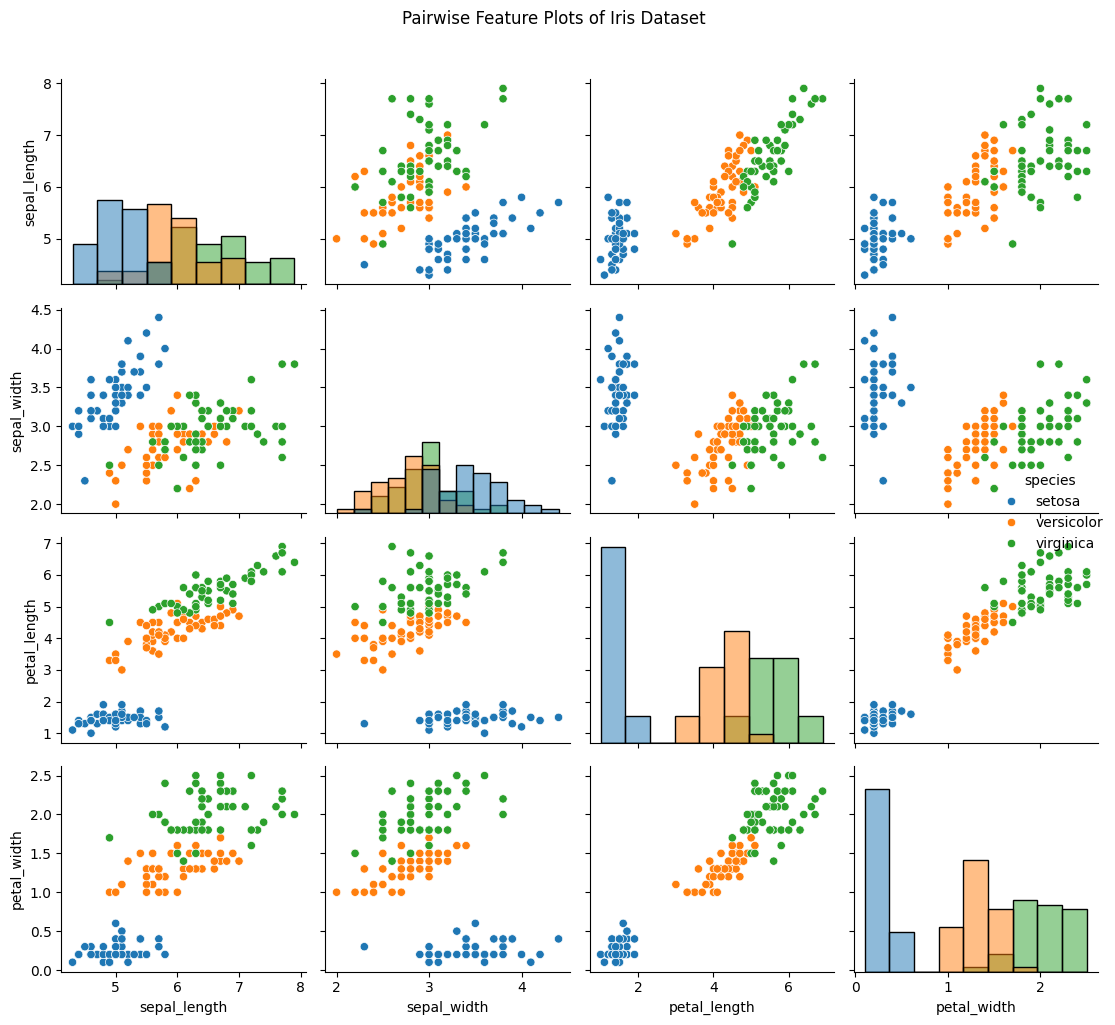

In [3]:
# 圖1：配對圖（Pairplot）
sns.pairplot(iris, hue="species", diag_kind="hist")
plt.suptitle("Pairwise Feature Plots of Iris Dataset", y=1.02)
plt.tight_layout()
plt.show()

<ipython-input-4-09bca95c0785>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="petal_width", data=iris, palette="Set2")


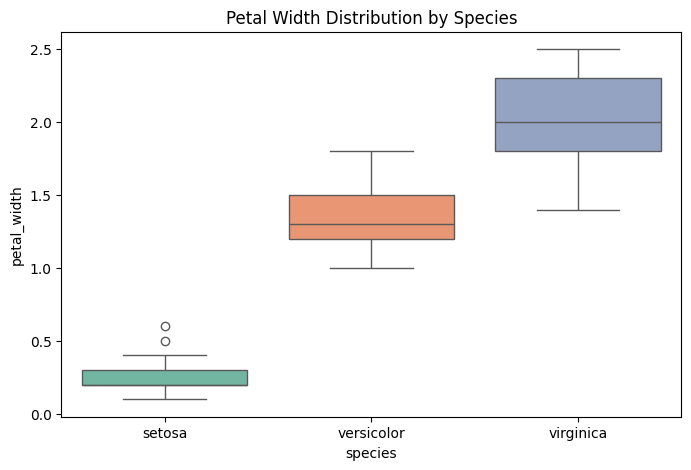

In [4]:
# 圖2：花瓣寬度箱型圖
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="petal_width", data=iris, palette="Set2")
plt.title("Petal Width Distribution by Species")
plt.show()

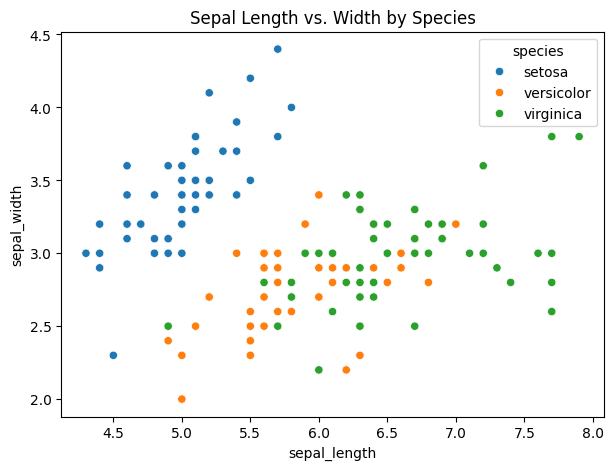

In [5]:
# 圖3：花萼長度與寬度的散佈圖
plt.figure(figsize=(7, 5))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris)
plt.title("Sepal Length vs. Width by Species")
plt.show()

## 結果與分析
1. Setosa 在 petal_width 與 petal_length 上明顯低於其他品種。
2. 花瓣特徵(petal_length, petal_width)最能有效區分三品種。
3. sepal_length 與 sepal_width 對分類幫助較小。

## 資料概覽
*   三品種樣本數皆為 50 筆，資料完整無缺值。
*   四個特徵皆為連續數值型變數。

## 視覺化分析
*   花瓣長度與寬度在 Setosa、Versicolor、Virginica 間明顯不同，適合作為分類依據。
*   花萼寬度變異較小，分類效果不佳。
*   使用 Seaborn pairplot 可觀察到明顯分群。

## 特徵重要性
*   petal_length 與 petal_width 在視覺化中具最強可分性，特別是 Setosa。

# 結論與建議

## 結論
1. 鳶尾花資料集是一組結構清晰、具可分性的經典分類資料。
2. 花瓣特徵在區分品種上明顯優於花萼特徵。
3. Setosa 品種在所有特徵中與其他品種區隔最為明顯。

## 建議
1. 若進一步進行機器學習分類，可優先選用 petal_length 與 petal_width 作為特徵。
2. 可考慮使用 SVM 或 k-NN 建立簡易分類模型。
3. 未來可延伸至其他花卉資料集或真實感測器資料進行多元分析。